
# CAP 5619 AI for FinTech 
###### Drs. Mesut Ozdag & Ramya Akula
###### Spring 2023
###### Midterm - Group Research Project

## BNPL Credit Worthiness ML application
#### Team 11
##### Brandon Doey, Pieter de Jong, Bunnary Say, Max Thedy, Michael Setzer


### 1 Problem Statement (Up to 200 words)
BNPL is predominantly tailored to populations with low credit scores and less access to banking. A typical loan application could take several days (or longer) and the process itself could intimidate potential borrowers. BNPL loans have increased significantly and are anticipated to do so in the future. The most recent data from 2022 indicate that a greater proportion of borrowers had incurred a late fee and that over 70% of applicants had been granted credit (Buy Now, Pay Later: Market trends and consumer impacts, 2022). Our Machine Learning application provides an instantaneous result based on user inputs. These input features have been trained through a machine-learning algorithm and have shown high accuracy with regards to loan default probability. The model will allow us to make a prediction in real time as to a client’s credit worthiness. At the final stage the client will be shown two distinctly different outcomes based on their inputs; they will either be approved for a loan and shown a website with credit options, or they will be referred to a web financial education application providing them with necessary steps to follow towards financial independence.

### 2 Dataset (Up to 200 words)
We used the very popular "All Lending Club loan data" dataset which is 400MB in size in a compressed format (George, n.d.). When uncompressed into a workable CSV format, this file is roughly 1.7GB in size and has 2,260,701 observations and 151 variables. This large size made it hard to work with and working with a file this size within Jupyter style notebooks (such as Deepnote and Google Colab) made even more complicated. For this reason (and with Dr. Mesut Ozdag's approval) we created a synthetic dataset that reduced the size of the file to roughly 30MB in size and we labeled it "loan_data_clean.csv" which is attached to, and used in, this notebook. 

### 3 Modeling Type and Technique (Up to 1500 words)
#### XGBoost Classification

Extreme Gradient Boosting or XGBoost is an optimized implementation of the gradient boosting machines (GBM) algorithm, designed for efficiency, flexibility, and scalability. Our project uses the XGBoost Classifier, which is a specific application of the XGBoost algorithm, which can be used for many supervised learning tasks beyond classification, such is regression, ranking, and feature selection. In a gradient boosting model, the goal of the model is the minimize the loss function by moving in the direction of the negative gradient. In a typical gradient descent model, the model’s parameters are updated directly. However, in a gradient boosting model, boosting rounds are repeatedly performed to approximate the negative gradient. In a boosting round the model builds a weak learner. Boosting rounds are iterated and through this process, these weak learners are combined to create ensembles (Brownlee, 2021), strong learners that can make accurate predictions. 

Weak learners, or base learners, are simple models that can predict the target variable at a rate slightly better than random chance. XGBoost uses decision trees for these weak learners. A boosting algorithm such as XGBoost is designed to combine multiple weak learners into a strong learner, which has more accurate predictions.

##### XGBoost for BNPL Loan Prediction

Our goal when selecting a model to implement for our loan prediction problem was to select a model with a high degree of accuracy, that could process a large dataset quickly and efficiently. Given that our original dataset had 2.2 million rows of data, efficiency was a priority. Given that we are predicting the success or failure of a loan, our problem was a binomial classification problem. XGBoost was selected for its balance between speed and accuracy when compared to other models (Morde, 2019). When compared to relatively simple models such as logistic regression and k-Nearest Neighbor, XGBoost takes longer to train, but has a higher degree of accuracy, especially in higher complexity problems. Single decision trees can be faster, and are much simpler than XGBoost, however XGBoost combines weak decision trees into an ensemble, which increases its accuracy when compared to single decision trees. Gradient boosting and random forest are able to achieve accuracy similar to XGBoost but are drastically less efficient and require much more time to train. 

XGBoost’s high degree of accuracy comes from its ensemble tree method and the principals of weak learner boosting. Unlike its parent model, GBM, XGBoost is able to maintain this degree of accuracy while performing quickly because of several key improvements and optimizations. Firstly, the pruning stage is critical in increasing computational efficiency. This reduces the complexity of the trees and leads to faster training. Secondly, XGBoost has been optimized to make better use of hardware resources. A parallelization process has been applied to improve runtime on sequential tree creation, and several improvements to memory and cache handling reduce resource costs, increasing overall efficiency and speed (Morde, 2019).

##### Decision Trees
Decision trees are core to the XGBoost Classifier model. A decision tree is a tree structure consisting of nodes, branches, and leaf nodes. In the case of XGBoost these decision trees are binary trees. The decision tree algorithm recursively splits the input data set into two subsets based on a feature value or other condition to arrive at a final prediction. For example, given a dataset of people with two included features, age and income, and a target variable to determine whether a given person had purchased a given product (1) or not purchased the product (0). The decision tree algorithm may start building the tree by evaluating many possible splits for each feature to find the one that best splits the variable classes. The algorithm could determine that the best split comes from splitting the data at the age threshold of 28 years. In this case the decision would be:


•	If Age <= 28, go to the left child node
•	If Age > 28, go to the right child node

The result would split the data set into two subsets, and would repeat continually until a criterion is met, such as maximum search depth, or further recursions are met with minimal improvements.

##### XGBoost Classification Algorithm Steps

1. Initialization
    It starts with an initial model that serves as the starting point for future improvement. The initial model does not use a decision tree, and instead uses a constant prediction model for simplicity and efficiency. This initial model provides a constant prediction of the log-odds for each class, for all instances in the dataset. These log-odds are later transformed into class probabilities.

2. Boosting round iterations (Chen & Guestrin, 2016)
    a. Iteration  
    After initializing the model using a CPM, XGBoost begins iteratively building decision trees. Each decision tree iteration seeks to correct the errors made by its predecessors in the model. This process continues iteratively until a stopping criterion, such as the `n_estimators` parameter is met. This iteration will create one new decision tree.

    b. Similarity Score Computation   
    For each tree, the model calculates a similarity score for each leaf node. The similarity score is based on the sum of the gradients and Hessian values of the instance within the node. A high similarity score indicates high similarity between the instances within that node.

    c. Pruning   
    In this stage, some branches within the trees are removed. This process helps to avoid overfitting. XGBoost uses a regularization term (gamma) to help determine the optimal number of branches to prune (XGBoost Developers).

    d. Output value calculation   
    For each leaf node, determine the output value. This output value represents the contribution of that leaf node to the final prediction. The output value can be considered as the leaf node’s weight, as it directly represents the leaf node’s contribution to the final prediction.

    e. Updating the model   
    The new tree’s output values are added to the current model. XGBoost uses a shrinkage parameter, to control the influence each tree has on the model. This shrinkage parameter is specified by the user as a learning rate, specified as eta in the parameters. Lower learning rates mean that each tree contributes less, but the model requires more iterations for convergence.

&nbsp;
3. Repetition

Steps 2a through 2e (boosting rounds) are repeated until a stopping criterion is met. Typical stopping criterion include the user parameters `num_boost_round` which specifies the number of boosted rounds or trees that can be created, `early_stopping_rounds` which specifies a maximum number of boosting rounds that can be performed with minimal improvements before the model stops, or `stopping_threshold` which is a threshold parameter determined by the user that indicates that further training is unlikely to provide significant benefit (XGBoost Developers).

4. Prediction generation
For each instance in the dataset, XGBoost calculates the sum of raw scores from the leaf values provided by each tree in the ensemble. This raw score is passed through a logistic function to transform it into a probability value between 0 and 1. Finally, a threshold is applied to make the final classification prediction. In a binomial classification, this threshold is typically 0.5. If the probability value of the instance is greater than the threshold, it is classified as the positive class, otherwise it is classified as the negative class (T., 2022).

##### Constant Prediction Model

A constant prediction model, like a decision tree, is a weak learner. XGBoost initializes using a CPM rather than another decision tree because of its simplicity and efficiency. The initial learner used in a boosting algorithm serves as a foundation for future learners. And when compared with decision trees, a CPM is relatively simple. This provides the boosting process with an unbiased starting point, that is easily built on. A CPM has the added benefit of computational efficiency. CPMs require less memory and resources than many other weak learners, and building additional learners on top of a CPM will require less computation and memory than a more complex model. And finally, CPMs provide a relatively flat starting point in the optimization space, which helps to determine the direction of the gradient for future weak models created during the boosting process.

The CPM is a log-odds of each class for all instances in the dataset. The odds ratio is the ratio of the probability of an instance belonging to a specific class to the probability of it not belonging to that class. Log-odds refers to the natural logarithm of this ratio for each class in the classification problem.
In mathematical terms this is represented as:

    log-odds(class i)=log⁡(P(class i)/(1-P(class i) ))
&nbsp;
P(class i) represents the proportion of instances that belong to class i in the data set. The log-odds produced by CPM are a constant value for all instances in the dataset. This is why CPM is a relatively simple starting point for XGBoost.

### 4 Implementation

+ Import all packages

+ Read data

+ Create an instance of the classifier

+ Train the classifier

+ Check on the training set and visualize performance

+ Compute the prediction according to the model

+ Test and Validate 

+ Check on the test set and visualize performance

+ Compute the evaluation metrics - accuracy, precision, recall, F1-score

+ Compute the confusion matrix - senstivity & specificity 


### 4.1 - Import all packages

In [1]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 12.6 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 17.0 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn import metrics
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import cv
from xgboost import plot_importance
import warnings
import numpy as np
warnings.filterwarnings('ignore')

### 4.2 - Read data

In [4]:
df = pd.read_csv('/work/loan_data_clean.csv')

# turn all columns to int type
loan_data = df.astype(int)

# drop loan_status from loan_data and assign to X
X = loan_data.drop('loan_status', axis=1)
y = loan_data['loan_status']

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)

X_train shape: (342057, 11)
y_train shape: (342057,)
X_test shape: (106894, 11)
y_test shape: (106894,)
X_val shape: (85515, 11)
y_val shape: (85515,)


### 4.3 - Create an instance of the classifier

In [5]:
# import XGBClassifier
xgb_model = XGBClassifier()


### 4.4 - Train the classifier

In [6]:
# Fit the model on training data 
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### 4.5 - Check on the training set and visualize the performance

In [7]:
# check on the training set and visualize the performance
y_pred = xgb_model.predict(X_train)
print('Training Accuracy: ', round(accuracy_score(y_train, y_pred)*100, 2), '%')
print('Training Precision: ', round(precision_score(y_train, y_pred)*100, 2), '%')
print('Training Recall: ', round(recall_score(y_train, y_pred)*100, 2), '%')
print('Training F1: ', round(f1_score(y_train, y_pred)*100, 2), '%')
print('Training ROC AUC: ', round(roc_auc_score(y_train, y_pred)*100, 2), '%')
print('Training Confusion Matrix: \n', confusion_matrix(y_train, y_pred))

Training Accuracy:  89.52 %
Training Precision:  87.4 %
Training Recall:  91.2 %
Training F1:  89.26 %
Training ROC AUC:  89.59 %
Training Confusion Matrix: 
 [[157307  21476]
 [ 14365 148909]]


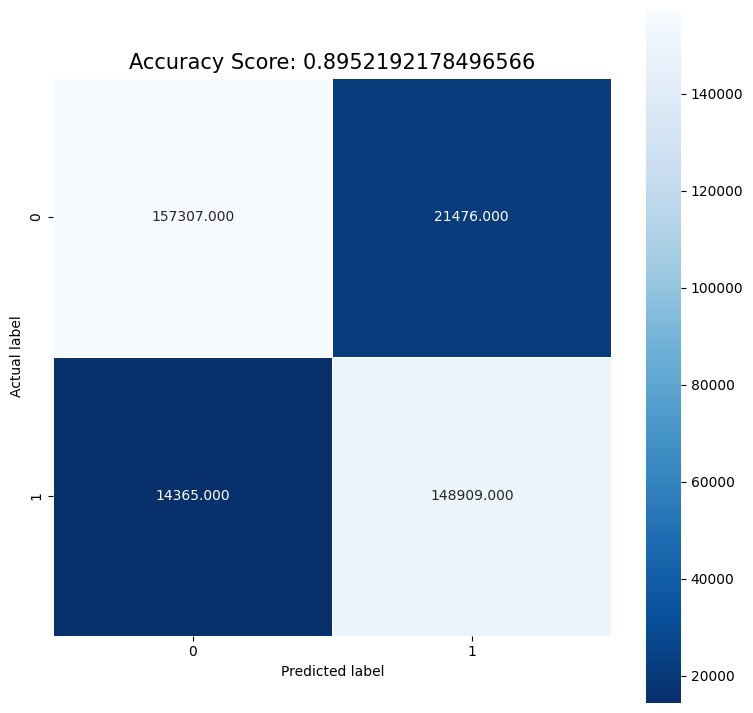

In [8]:
# visualize the performance
cm = metrics.confusion_matrix(y_train, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_train, y_pred))
plt.title(all_sample_title, size = 15);

### 4.6 - Compute the prediction according to model

In [9]:
# make predictions on the testing set
y_pred_class = xgb_model.predict(X_test)

# print true vs predicted
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1]
Pred: [0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1]


### 4.7 - Test and validate

In [10]:
# test and validate the model
print('Testing Accuracy score: ', round(accuracy_score(y_test, y_pred_class)*100, 2), '%')
print('Testing Precision score: ', round(precision_score(y_test, y_pred_class)*100, 2), '%')
print('Testing Recall score: ', round(recall_score(y_test, y_pred_class)*100, 2), '%')
print('Testing F1 score: ', round(f1_score(y_test, y_pred_class)*100, 2), '%')
print('Testing ROC AUC score: ', round(roc_auc_score(y_test, y_pred_class)*100, 2), '%')
print('Testing Confusion matrix: \n', confusion_matrix(y_test, y_pred_class))

Testing Accuracy score:  88.96 %
Testing Precision score:  86.94 %
Testing Recall score:  90.47 %
Testing F1 score:  88.67 %
Testing ROC AUC score:  89.02 %
Testing Confusion matrix: 
 [[48907  6939]
 [ 4867 46181]]


In [11]:
# k-fold cross validation using xgboost (see Banerjee, 2020)

# define data dmatrix 
dmatrix = xgb.DMatrix(data=X,label=y)

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,'max_depth': 7, 'alpha': 10}

xgb_cv = cv(dtrain=dmatrix, params=params, nfold=3, num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

# full results of the cross validation
xgb_cv

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.591553,0.000213,0.589323,0.000252
1,0.718392,0.156254,0.716047,0.156544
2,0.826310,0.146514,0.825172,0.147341
3,0.825753,0.148718,0.824337,0.149386
4,0.924882,0.002429,0.923914,0.002187
5,0.920101,0.005565,0.919111,0.004623
6,0.935704,0.003070,0.935054,0.002236
7,0.936772,0.003763,0.936129,0.002679
8,0.937670,0.003149,0.937030,0.002197
9,0.938872,0.002684,0.938165,0.002497


In [12]:
# cross validation summary
print('Cross-validation ROC AUC score: ', round(xgb_cv['test-auc-mean'].iloc[-1]*100, 2), '%')

Cross-validation ROC AUC score:  94.51 %


### 4.8 - Check on the test set and visualize the performance

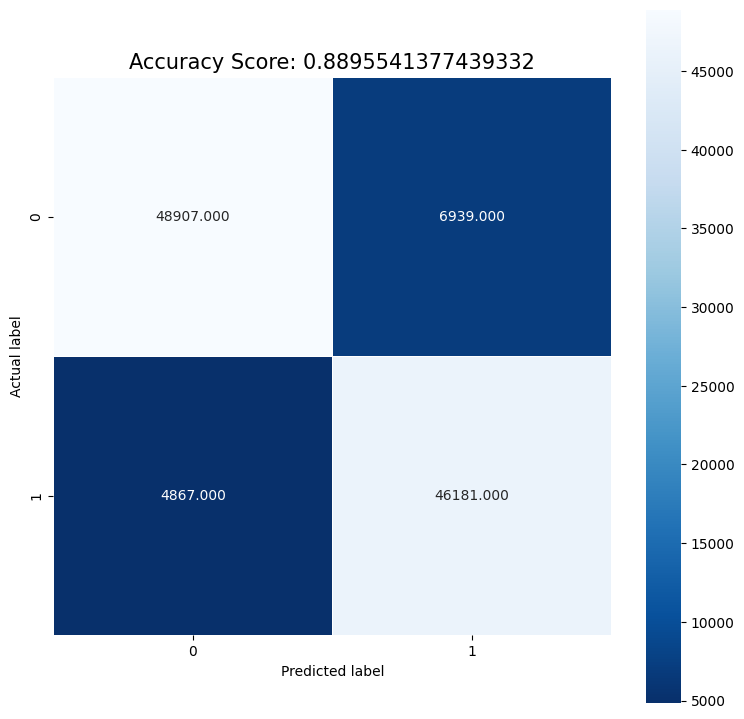

In [13]:
# visualize the performance
cm = metrics.confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred_class))
plt.title(all_sample_title, size = 15);

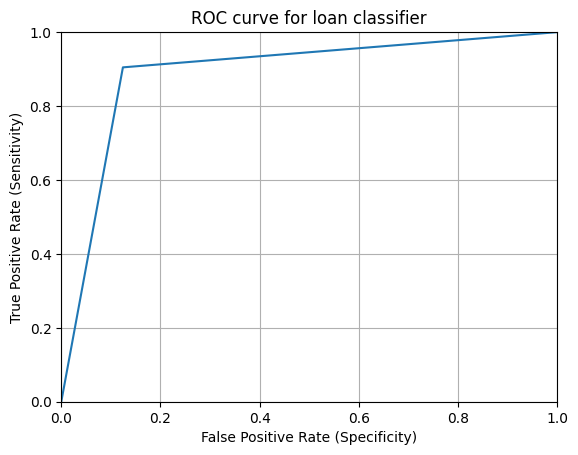

In [14]:
# plot ROC curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for loan classifier')
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### 4.9 - Compute the evaluation metrics - accuracy, precision, recall, F1-score 

In [15]:
# evaluate the model on the validation set
y_val_pred = xgb_model.predict(X_val)
print('Validation accuracy score: ', round(accuracy_score(y_val, y_val_pred)*100, 2), '%')
print('Validation precision score: ', round(precision_score(y_val, y_val_pred)*100, 2), '%')
print('Validation recall score: ', round(recall_score(y_val, y_val_pred)*100, 2), '%')
print('Validation F1 score: ', round(f1_score(y_val, y_val_pred)*100, 2), '%')
print('Validation ROC AUC score: ', round(roc_auc_score(y_val, y_val_pred)*100, 2), '%')

Validation accuracy score:  89.13 %
Validation precision score:  87.06 %
Validation recall score:  90.76 %
Validation F1 score:  88.87 %
Validation ROC AUC score:  89.2 %


### 4.10 - Compute the confusion matrix - sensitivity & specificity

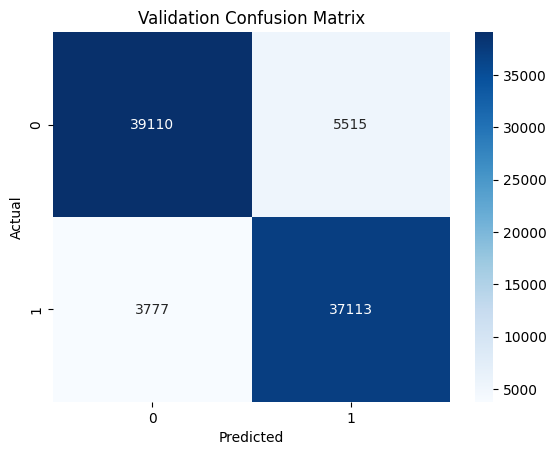

In [16]:
# visualize the validation confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


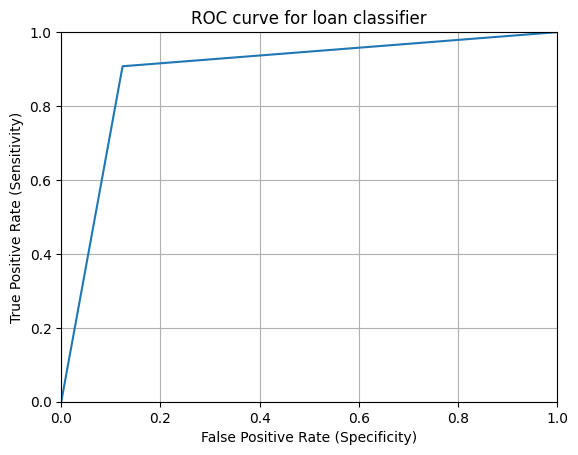

In [17]:
# plot ROC curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for loan classifier')
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### 5 Observations  (Up to 1000 words)
5.1 Plot to show balanced dataset
5.2 Plot Correlation Matrix
5.3 Kernel Density Estimation Plot
5.4 Violin Plot for loan_status and annual_inc
5.5 Violin Plot for loan_status and dti


### 5.1 - Plot to show balanced dataset

This plot shows the balanced relationship between the loan status recipients. The dummy variable 1 indicates the "Charged Off" whereas the 0 reflects the "Fully Paid". The original dataset was extremely unbalanced which can lead to poor model performance. In the first screenshot below, you will see the different values under "loan_status". We decided to keep only the "Charged Off" and "Fully Paid" values and dropped the other records that indicated a different loan status. After that, we randomly dropped several records that were "fully paid" to better balance the data and to avoid overfitting during the training process.


![Picture title](image-20230323-102218.png)

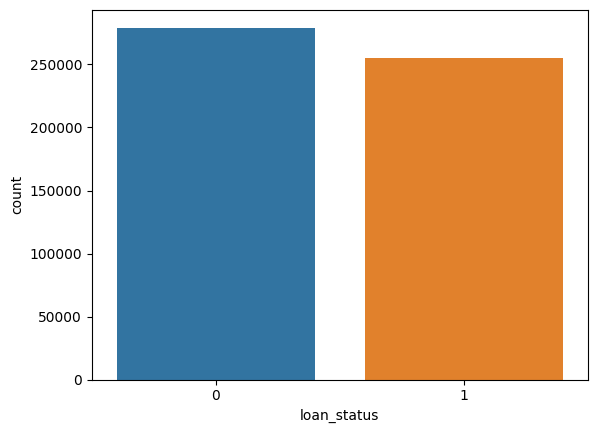

In [18]:
# visualize the target variable in the original dataset to establish balanced dataset
sns.countplot(x='loan_status', data=df)
plt.show()

### 5.2 - Plot Correlation Matrix

The plot correlation chart is a useful tool for visualizing the relationship between variables in this dataset (Kumar, 2022). In the context of the Buy Now Pay Later Sector, the variables included in the plot correlation matrix are employment length, annual income, debt-to-income ratio, delinquencies within the last two years, open accounts, mortgage accounts, public record bankruptcies, last high FICO score range, earliest credit line, and loan status. Through this analysis, we can identify which variables are most strongly correlated with each other. For example, there is a strong positive correlation between number of mortgage accounts and employment length suggesting that people with a longer employment history tend to have more stable jobs and are therefore more likely to be approved for a mortgage. On the other hand, there is a strong negative correlation between FICO score and our target variable of loan status. This would suggest that individuals with a lower credit score are more likely to default on their loan. While highly correlated features can affect the performance of many linear regression models through a condition known as "multicollinearity", decision tree models are, by nature, more resilient to the presence of such correlations since the model will choose only one feature when training (Chen & Guestrin, 2016). For this reason, and because we feel these features are important to our data model, we decided to keep them in the dataset. By understanding the relationships between variables, we can make better lending decisions and reduce the risk of defaults. This can lead to increased profitability and a more sustainable Buy Now Pay Later business model.

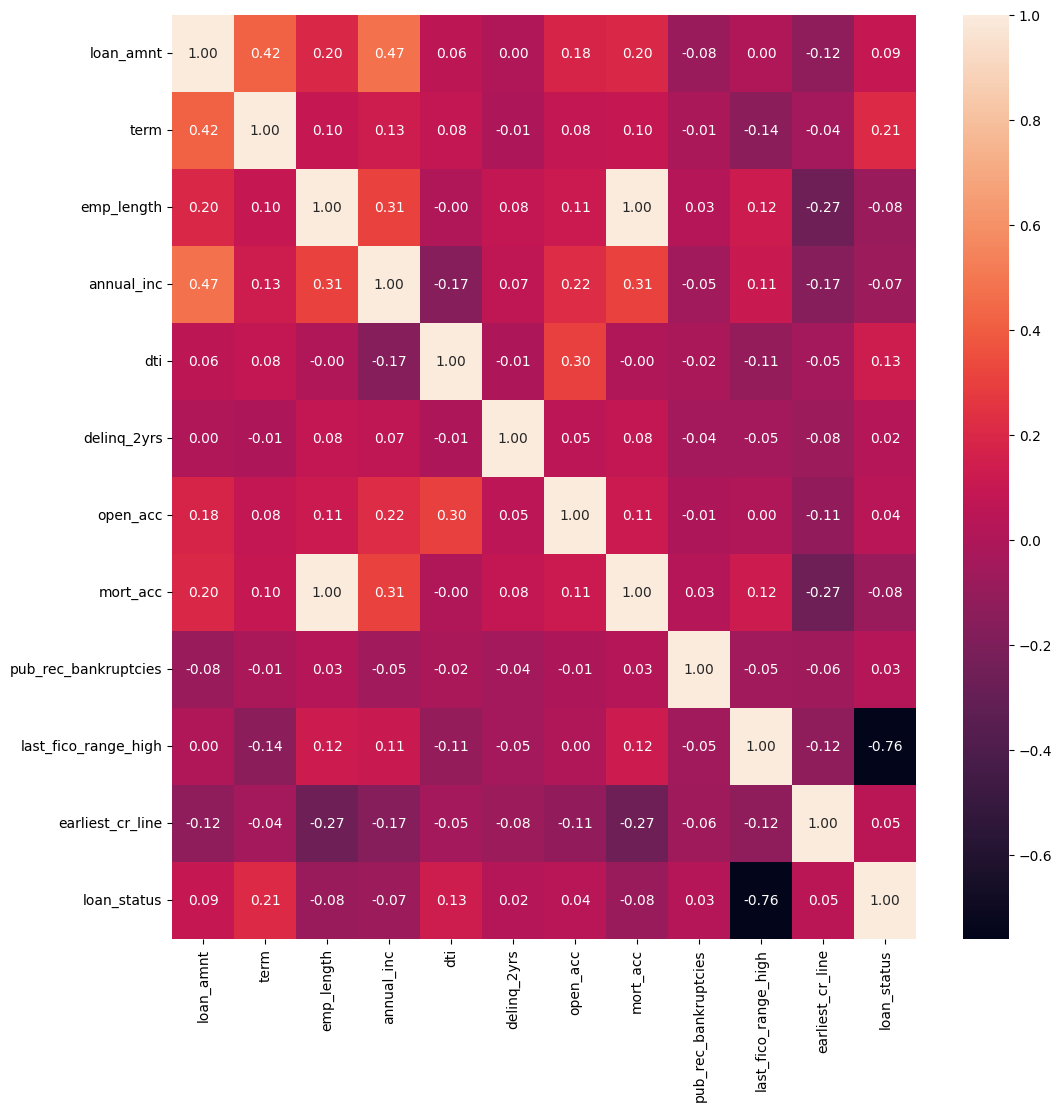

In [19]:
# plot correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(loan_data.corr(), annot=True, fmt='.2f')
plt.show()

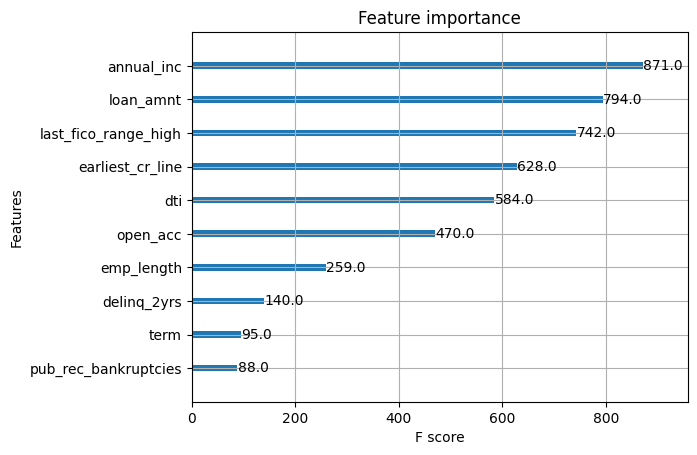

In [20]:
# plot feature importance
plot_importance(xgb_model)
plt.show()

### 5.3 - Kernel Density Estimation Plot

The Kernel density estimation (KDE) graph is used to estimate the probability density function of a random variable (Malhotra, 2020). When applied to loan status and FICO score, this KDE plot is used to help us visualize the distribution of FICO scores for borrowers with different loan statuses. The graph shows FICO 450 score being very low and 850 being excellent. By using this KDE plot, we can see how the distribution of FICO scores varies across different loan statuses. In short, the KDE plots for loan status and FICO score suggest that a higher FICO score is associated with a lower likelihood of loan default and a higher likelihood of fully paying off the loan. This information can be used to evaluate the creditworthiness of borrowers and make informed lending decisions. For example, borrowers who have defaulted on their loans may have a peak in the distribution around a low FICO score of 450, indicating that borrowers with lower FICO scores are more likely to default on their loans.  In contrast, borrowers who are currently making payments on their loans may have a peak in the distribution around a high FICO score of 850, indicating that borrowers with higher FICO scores are more likely to make their payments on time. This helps us identify the FICO score range associated with higher risk of default and offer tailored BNPL options to borrowers with different creditworthiness levels.

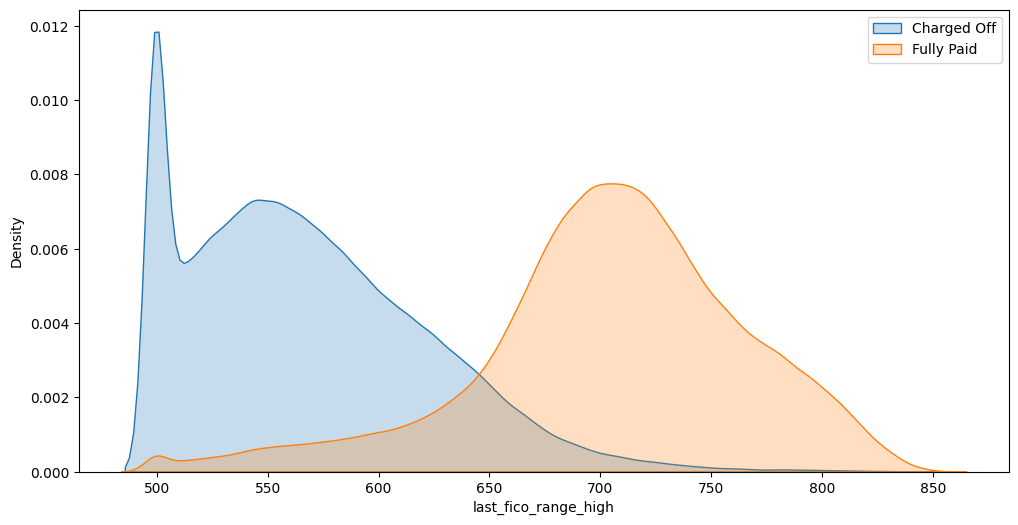

In [21]:
# Kernel Density Estimation Plots for loan_status and last_fico_range_high and show legend
plt.figure(figsize=(12, 6))
sns.kdeplot(loan_data[loan_data['loan_status'] == 1]['last_fico_range_high'], label='Charged Off', shade=True)
sns.kdeplot(loan_data[loan_data['loan_status'] == 0]['last_fico_range_high'], label='Fully Paid', shade=True)
plt.xlabel('last_fico_range_high')
plt.ylabel('Density')
plt.legend()
plt.show()

### 5.4 - Density Graph and Violin Plot for Loan Status and Annual Income

In the original dataset, there were many records that would be considered as outliers regarding annual income. The first graph below indicates that there were some individuals who reported an annual income above 1 million. To better balance out the dataset, we removed any record (whether it was defaulted or fully paid off) whose annual income exceeded 150,000. the second graph below is a violin plot that shows the more accurate representation of records throughout the dataset. We feel this represents a larger majority of individuals who would be applying for a loan and by dropping these outliers, we can further increase our model’s performance (Brownlee, 2018).

![Picture title](image-20230323-101033.png)

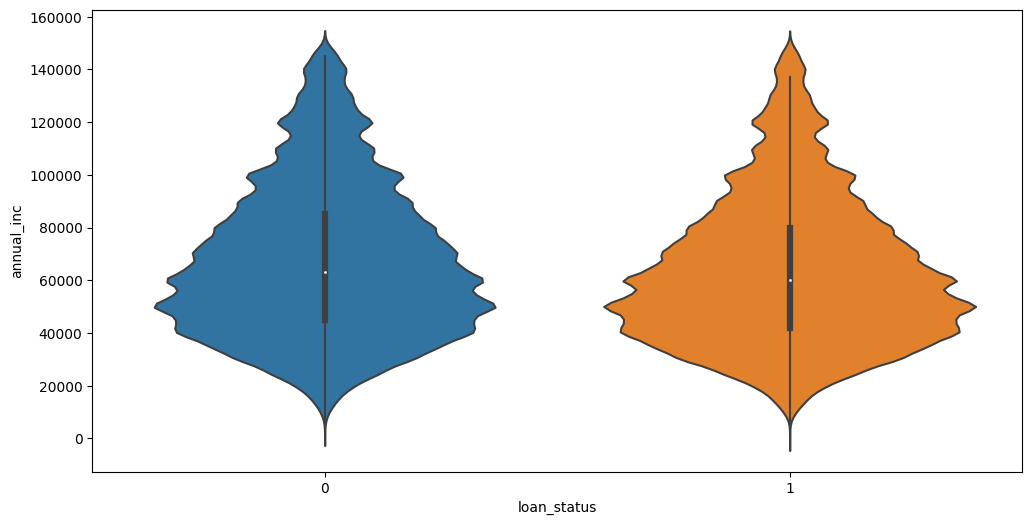

In [22]:
# violin plot for loan_status and annual_inc
plt.figure(figsize=(12, 6))
sns.violinplot(x='loan_status', y='annual_inc', data=loan_data)
plt.show()

### 5.5 Violin Plot for Loan Status and Debt-to-Income (DTI)

The second panel shows another violin plot (Yi, n.d.). It is also used to display the distribution of a dataset and revealing the relationship between variables. The relationship that is represented in this violin plot is the relationship between loan status and debt-to-income ratio. In this plot, the y-axis shows the density of data points, which in this case, is the debt-to-income ratio. The x-axis represents loan status. By looking at the plot, we can observe the spread of the data and identify any outliers. We can also compare the distribution of loan status and debt-to-income ratio to see how they are related. The plot shape is determined by the kernel density estimate of the data at each point along the x-axis. The width of the plot represents the density of the data, while the height of the plot indicates the number of observations. The first graph below shows the outliers that existed in our original dataset. By removing these records, we were able to obtain a better distribution of data and gained better understand the relationship between loan status and debt-to-income ratio. In summary, the violin plot is a powerful tool for visualizing data and examining the relationship between variables. In the case of loan status and debt-to-income ratio, the plot provides insight into factors that are considered when evaluating creditworthiness.





![Picture title](image-20230322-195642.png)

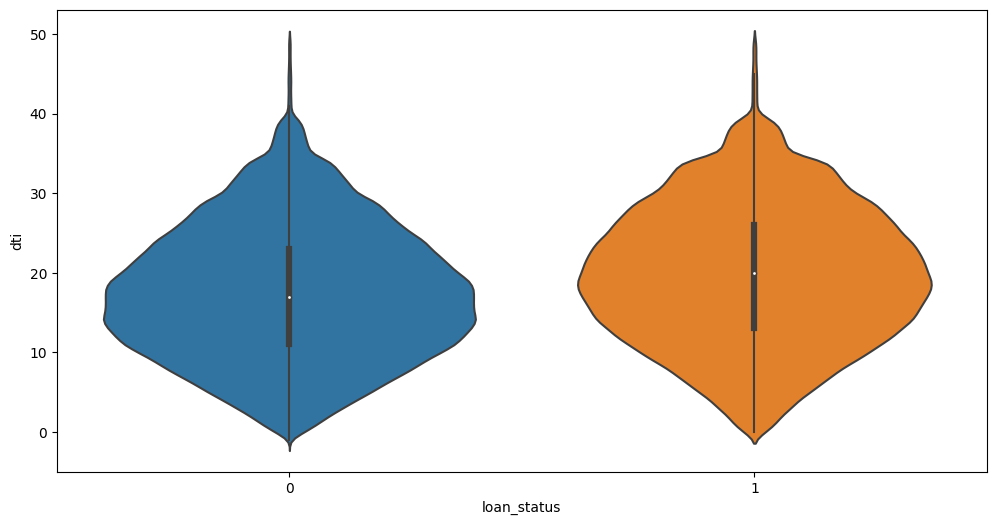

In [23]:
# violin plot for loan_status and dti
plt.figure(figsize=(12, 6))
sns.violinplot(x='loan_status', y='dti', data=loan_data)
plt.show()

### 6 References:

Banerjee, P. (2020, December 8). XGBoost + k-fold CV + Feature Importance. Kaggle.com. Retrieved March 23, 2023, from https://www.kaggle.com/code/prashant111/xgboost-k-fold-cv-feature-importance

Brownlee, J. (2021, April 26). Extreme gradient boosting (XGBoost) ensemble in Python. MachineLearningMastery.com. Retrieved March 19, 2023, from https://machinelearningmastery.com/extreme-gradient-boosting-ensemble-in-python/ 

Brownlee, J. (2018, April 25). Machine Learning Mastery. Retrieved from How to Remove Outliers for Machine Learning: https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

Buy Now, Pay Later: Market trends and consumer impacts. (2022, September 15). Retrieved from CFBP: https://www.consumerfinance.gov/data-research/research-reports/buy-now-pay-later-market-trends-and-consumer-impacts/

Chen, T., He, T., Benesty, M., Khotilovich, V., Tang, Y., Cho, H., ... & Zhou, T. (2015). Xgboost: extreme gradient boosting. R package version 0.4-2, 1(4), 1-4.

Chen, T., & Guestrin, C. (2016, August). Xgboost: A scalable tree boosting system. In Proceedings of the 22nd acm sigkdd international conference on knowledge discovery and data mining (pp. 785-794).

Dahal, P. (2017, May 28). Classification and loss evaluation - softmax and cross entropy loss. DeepNotes. Retrieved March 20, 2023, from https://deepnotes.io/softmax-crossentropy 

George, N. (n.d.). Kaggle. Retrieved from All Lending Club loan data: https://www.kaggle.com/datasets/wordsforthewise/lending-club

Kumar, A. (2022, April). Correlation Concepts, Matrix & Heatmap using Seaborn. Retrieved from Vitalflux: https://vitalflux.com/correlation-heatmap-with-seaborn-pandas/amp/

Malhotra, V. (2020, October 12). Medium. Retrieved from ML04: Kernel Density Estimation: https://medium.com/analytics-vidhya/ml04-kernel-density-estimation-ee29a1578d0c

Morde, V. (2019, April 8). XGBoost Algorithm: Long May She Reign! Medium. Retrieved March 18, 2023, from https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d

T., B. (2022, December 9). Beginner's Guide to xgboost for classification problems. Medium. Retrieved March 19, 2023, from https://towardsdatascience.com/beginners-guide-to-xgboost-for-classification-problems-50f75aac5390 

XGBoost Developers. (n.d.). XGBoost documentation. XGBoost Documentation - xgboost 1.7.4 documentation. Retrieved March 19, 2023, from https://xgboost.readthedocs.io/en/stable/index.html

Yi, M. (n.d.). Chartio.com. Retrieved from A Complete Guide to Violin Plots: https://chartio.com/learn/charts/violin-plot-complete-guide/




<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8378e1ce-38bb-4a0c-954e-7be4407070b6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>